
## ZMUM 1

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

Naszą uwagę będziemy skupiać na znalezieniu wektora $w$.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy, że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy:

$$e_1=\hat{f}(x_1)−y_1$$
$$e_2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e_k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e_1, … , e_k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.

$$ X  w = Y ,$$ gdzie

$$X = \left|\begin{array}{cxccc}
1&x_1&x_1^2&...&x_1^n\\
1&x_2&x_2^2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&x_k^2&...&x_k^n\end{array}\right| $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right| $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right| $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):

$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$$ w=X^+Y,$$ 

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

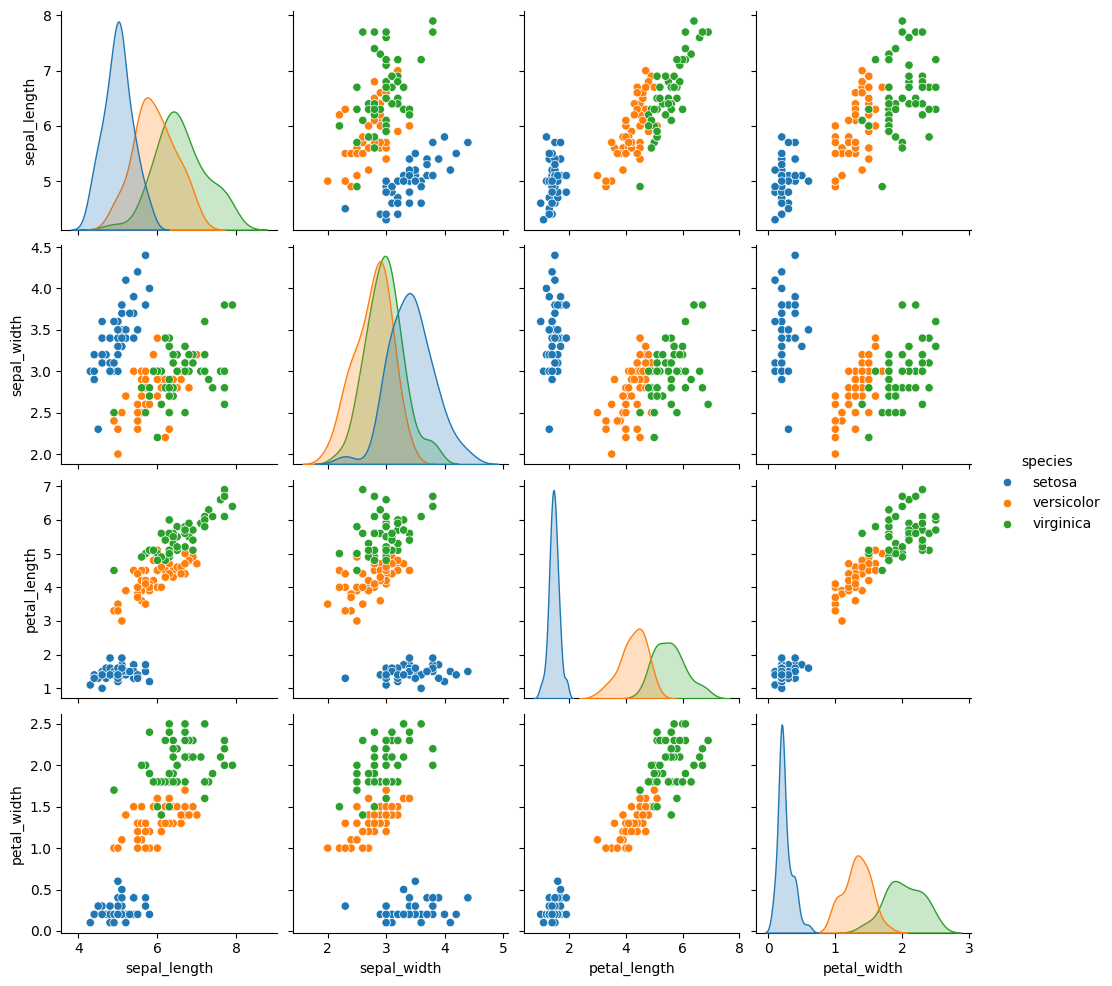

In [2]:
%matplotlib inline
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()
sns.pairplot(iris, kind="scatter", hue = "species")
plt.show()

<Axes: >

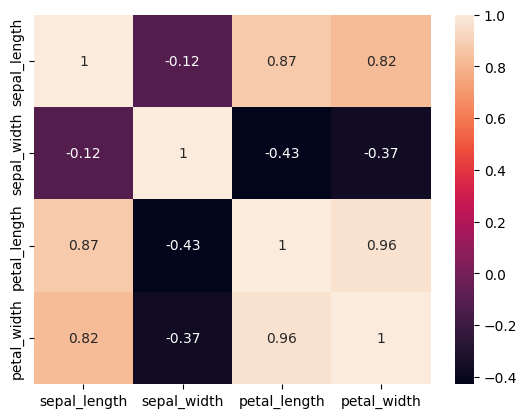

In [3]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.heatmap(iris[columns].corr(),annot = iris[columns].corr())

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

**Wnioski**
* Najbardziej skorelowane atrybuty: *petal_width* i *petal_length* z korelacją na poziomie **0.96**.
* Najmniej skorelowane atrybuty: *sepal_width* i *sepal_length* z korelacją na poziomie **-0.12**.

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [4]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [6]:
regressor = LinearRegression()  
regressor.fit(x,y) 

LinearRegression()

Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [7]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [8]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

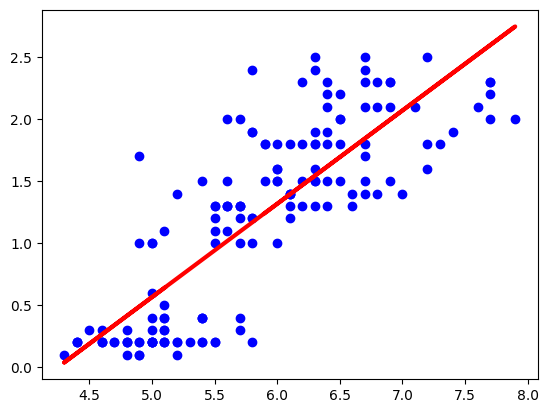

In [9]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [10]:
e = metrics.mean_squared_error(y, y_pred)
e

np.float64(0.19101500769427357)

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość bładu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [11]:
def calculate_lr(frame, atr1, atr2):
    x = iris.iloc[:,atr1].values.reshape(-1,1)
    y = iris.iloc[:,atr2].values.reshape(-1,1)
    
    regressor = LinearRegression().fit(x,y)
    w_1 = regressor.intercept_
    w_2 = regressor.coef_
    
    y_pred = regressor.predict(x)
    e = metrics.mean_squared_error(y, y_pred)
    
    return "w_0: %s, w_1: %s, e: %s" % (w_1[0], w_2[0][0], e)

print(calculate_lr(iris, 0, 3))

w_0: -3.200215004649192, w_1: 0.7529175706758457, e: 0.19101500769427357


In [12]:
x = iris.iloc[:,0].values

In [13]:
X = np.vstack((np.ones(len(x)),x)).T

In [14]:
X.shape

(150, 2)

In [15]:
y.shape

(150, 1)

In [16]:
import scipy
def our_regression(dane, atr1, atr2):
    x = dane.iloc[:,atr1].values
    y = dane.iloc[:,atr2].values.reshape(-1,1)
    X = np.vstack((np.ones(len(x)),x)).T
    #w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    w = np.dot(scipy.linalg.pinv(X),y)
    
    e = np.sum((np.dot(X,w)-y)**2)/len(x)   
    
    #np.linalg.pinv(X) # pseudoinwersja bazująca na metodzie Moore-Penrose
    #scipy.linalg.pinv(X) # pseudoinwersja bazująca na metodzie Moore-Penrose
    #scipy.linalg.pinv2(X) # pseudoinwersja bazująca na metodzie SVD
    
    return w, e


In [17]:
w, e = our_regression(iris,0,3)
print(w)
print(e)

[[-3.200215  ]
 [ 0.75291757]]
0.1910150076942736


> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (wariancja) modelu jest największa, a dla których - najmniejsza. Czy można zauwazyć zależność tej miary od miary korelacji?

**Wnioski:**
* Najmniejszy błąd dopasowania występuje dla atrubutów  2 i 3 (*petal_length* i *petal_width*).
* Największy błąd dopasowania występuje dla atrubutów  1 i 2 (*sepal_witdh* i *petal_length*).
* Tak, istnieje zależność pomiędzy błędem dopasowania, a miarą korelacji - atrybuty mocno skerolowane mają mały błąd dopasowania.

In [18]:
print(our_regression(iris,0,1))
print(our_regression(iris,0,2))
print(our_regression(iris,0,3))
print(our_regression(iris,1,2))
print(our_regression(iris,1,3))
print(our_regression(iris,2,3))

(array([[ 3.41894684],
       [-0.0618848 ]]), np.float64(0.18610437589381357))
(array([[-7.10144337],
       [ 1.85843298]]), np.float64(0.743061034132124))
(array([[-3.200215  ],
       [ 0.75291757]]), np.float64(0.1910150076942736))
(array([[ 9.06315061],
       [-1.73522152]]), np.float64(2.527289340028199))
(array([[ 3.15687229],
       [-0.64027659]]), np.float64(0.4997692648522702))
(array([[-0.36307552],
       [ 0.41575542]]), np.float64(0.04206730919499318))


<Axes: >

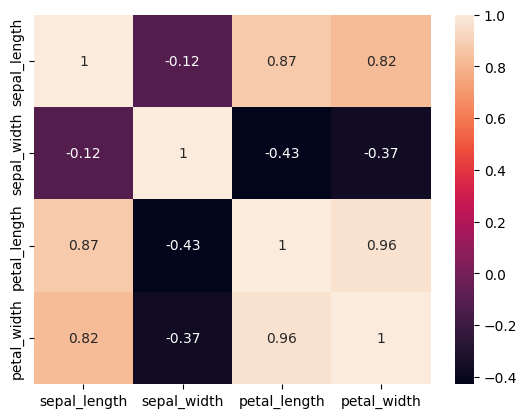

In [19]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.heatmap(iris[columns].corr(),annot = iris[columns].corr())

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

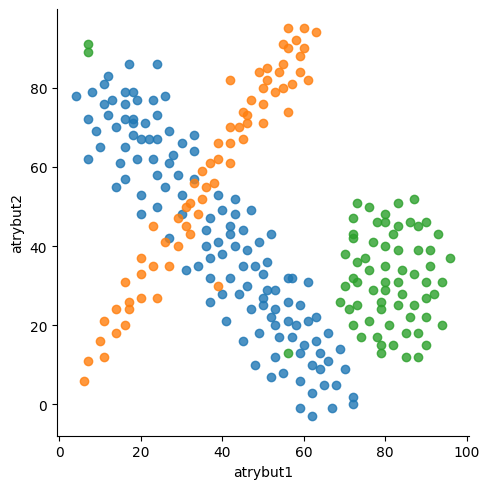

In [20]:
d = pd.read_csv('dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [21]:
d.klasa.unique()

array(['klasa 3', 'klasa 2', 'klasa 1'], dtype=object)

In [22]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


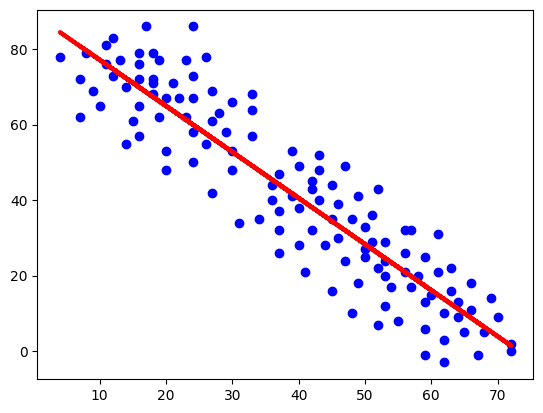

In [23]:
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

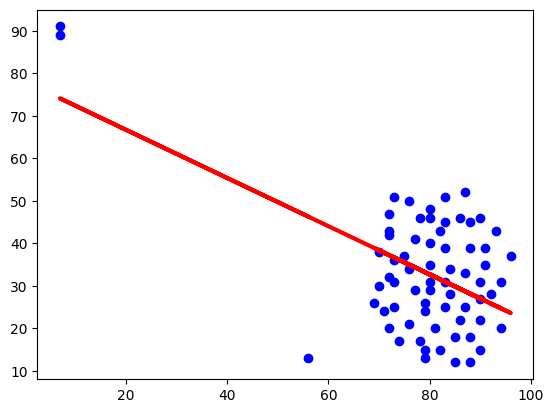

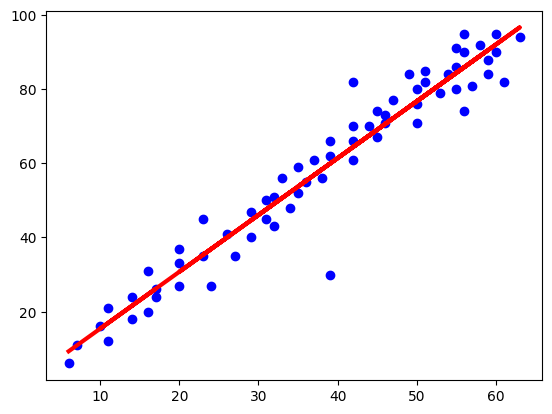

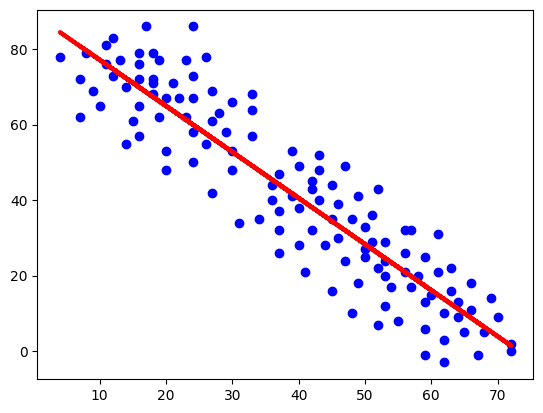

In [24]:
%matplotlib inline
def show(klasa):
    dd = d[d.klasa == klasa]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)
    regressor = LinearRegression()  
    regressor.fit(x,y) 
    y_pred = regressor.predict(x)
    plt.scatter(x, y,  color='blue')
    plt.plot(x, y_pred, color='red', linewidth=3)
    plt.show()
    
show("klasa 1")
show("klasa 2")
show("klasa 3")

Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [25]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

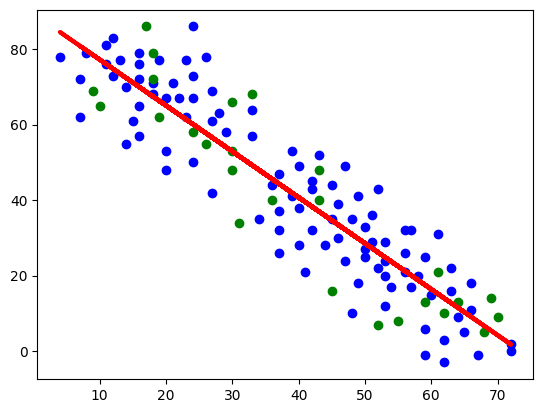

błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452


In [26]:
regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele sa bardziej, a dla których - mniej stabilne ? Dlaczego ?

In [27]:
%matplotlib inline
def calculate_error(klasa):
    dd = d[d.klasa == klasa]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)
    
    x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=None)
    
    regressor = LinearRegression()  
    regressor.fit(x_ucz,y_ucz) 
    y_pred_ucz = regressor.predict(x_ucz)
    e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
    y_pred_test = regressor.predict(x_test)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)
    return [e_ucz, e_test]


n = 10
for cla in ['klasa 1', 'klasa 2', 'klasa 3']:
    results = pd.DataFrame(columns=['Błąd uczenia', 'Błąd generalizacji'])
    
    for i in range(n):
        results.loc[i] = calculate_error(cla)

    print(cla,':')
    display(results.describe())

klasa 1 :


,Błąd uczenia,Błąd generalizacji
count,10.000000,10.000000
mean,140.614072,261.365526
std,15.246802,177.265060
min,117.727039,125.599150
25%,129.644993,154.487392
50%,146.002716,190.986836
75%,152.150584,237.241439
max,159.949862,619.778624


klasa 2 :


,Błąd uczenia,Błąd generalizacji
count,10.000000,10.000000
mean,42.854212,32.584800
std,5.586851,21.162013
min,29.384259,15.462101
25%,42.401527,17.733710
50%,44.570100,25.110715
75%,46.664319,38.163181
max,47.529062,82.422358


klasa 3 :


,Błąd uczenia,Błąd generalizacji
count,10.000000,10.000000
mean,101.866520,95.414411
std,6.060209,23.973685
min,89.844415,66.380622
25%,98.591278,73.112424
50%,101.229068,98.835279
75%,107.325758,108.841043
max,109.074089,141.197704


**Wnioski**
* Kilkukrotne podzielenie zbioru danych na uczący i testowy pozwala na zaobserwowanie zależności pomiędzy stabilnością uzyskiwanych wyników, a rozkładem danych klas.
* Klasy 2 i 3 charakteryzują się dużo większą stabilnością wyników od klasy 1. Można to stwierdzić na podstawie odchylenia standardowego błędów dla n przeprowadzonych prób, które wynosi aż 181,99 przy średniej 197,87 dla klasy 1, oraz odpowiednio 25,64 przy średniej 43,66 i 22,14 przy średniej 111,26 dla klas 2 i 3.
* Wpływ na stabilność wyników ma rozmieszczenie danych uczących. W przypadku klasy 1 daną nie są skorelowane, co pozwala na uzyskiwanie różnej regresji liniowej w zależności od danych przypisanych do zbioru uczącego. W przypadku klas 2 i 3 dane są wyraźnie bardziej skorelowane, co pozwala na zachowanie większej niezależności przebiegu regresji liniowej od podziału zbioru.


# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 30 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

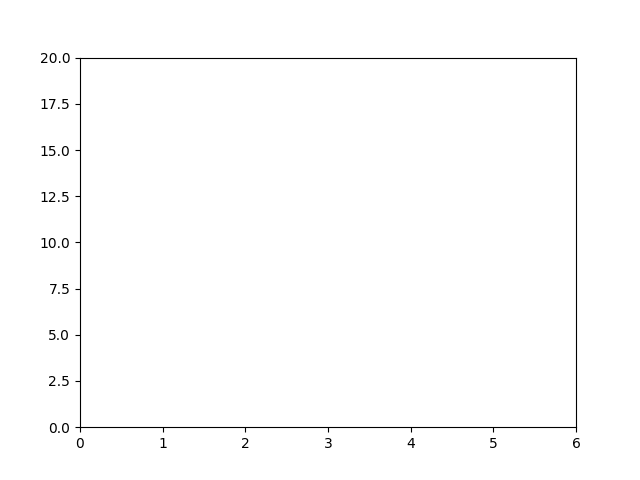

In [28]:
%matplotlib widget
ile_probek = 30
ile_razy_wiecej = 0
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axis([0, 6, 0, 20])

xx = []
yy = []
df = []

def onclick(event):
    global xx, yy, df
    ix, iy = event.xdata, event.ydata
    print( 'x = %d, y = %d'%(ix, iy))
    ax.plot(ix,iy,'ro')
    xx.append(ix)
    yy.append(iy)
    if len(xx) == ile_probek:
        fig.canvas.mpl_disconnect(cid)
        if (ile_razy_wiecej > 0):
            xx_org = xx
            yy_org = yy
            for i in range(1,ile_razy_wiecej):
                print(i)
                xx = np.concatenate((xx,xx_org+np.random.rand(len(xx_org))/2),axis=0)
                yy = np.concatenate((yy,yy_org+np.random.rand(len(yy_org))/2),axis=0)                
        df = pd.DataFrame({'x': xx, 'y': yy})
cid = fig.canvas.mpl_connect('button_press_event', onclick)

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [29]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       30 non-null     float64
 1   y       30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


,x,y
0,0.127016,0.737114
1,0.247984,1.332353
2,0.344758,2.144041
3,0.489919,2.793392
4,0.671371,3.496855
5,0.949597,4.146205
6,1.239919,4.470881
7,1.469758,4.633218
8,1.735887,4.795556
9,1.977823,4.903781


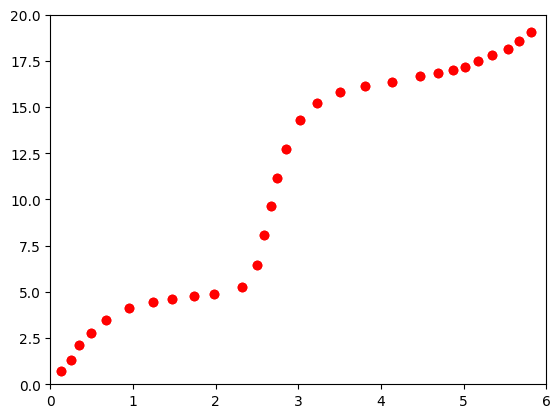

In [30]:
%matplotlib inline
plt.scatter(df.x, df.y, color='red')
plt.show()

Poniżej mamy funkcję, która tworzy macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [31]:
import scipy
def our_regression(dane, atr1, atr2, stopien):
    x = dane.iloc[:,atr1].values
    y = dane.iloc[:,atr2].values.reshape(-1,1)
    X = np.ones(len(x))
    if stopien >= 1:
        for i in range(1,stopien+1):
            X = np.vstack((X,np.power(x,i)))
        X=X.T
    else:
        print("Stopień wielomianu powinien być > 0 ")
        return
    
#     w = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    w = np.dot(scipy.linalg.pinv(X),y)
    
    e = np.sum((np.dot(X,w)-y)**2)/len(x)   
    
    
    #np.linalg.pinv(X) # pseudoinwersja bazująca na metodzie Moore-Penrose
    #scipy.linalg.pinv(X) # pseudoinwersja bazująca na metodzie Moore-Penrose
    #scipy.linalg.pinv2(X) # pseudoinwersja bazująca na metodzie SVD
    
    
    return w, e

In [32]:
print(our_regression(df,0,1,1))
print(our_regression(df,0,1,2))
print(our_regression(df,0,1,3))
print(our_regression(df,0,1,5))
print(our_regression(df,0,1,10))
print(our_regression(df,0,1,2))

(array([[0.67598343],
       [3.40437956]]), np.float64(3.023087031378126))
(array([[-0.34278788],
       [ 4.46822922],
       [-0.17889599]]), np.float64(2.7735703411958625))
(array([[ 1.83365453],
       [-0.53406525],
       [ 2.01515328],
       [-0.25026079]]), np.float64(1.9162816180337325))
(array([[ -1.19120838],
       [ 15.27326061],
       [-17.63771678],
       [  8.96205829],
       [ -1.80156154],
       [  0.12431187]]), np.float64(0.9170192122922419))
(array([[-4.02479237e+00],
       [ 5.54242520e+01],
       [-1.99362367e+02],
       [ 3.70844004e+02],
       [-3.77563814e+02],
       [ 2.25138686e+02],
       [-8.19811463e+01],
       [ 1.84711492e+01],
       [-2.51492433e+00],
       [ 1.89747262e-01],
       [-6.09475860e-03]]), np.float64(0.231587886116983))
(array([[-0.34278788],
       [ 4.46822922],
       [-0.17889599]]), np.float64(2.7735703411958625))


> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


Współczynniki dla stopnia 1: [0.67598343 3.40437956]
Współczynniki dla stopnia 2: [-0.34278788  4.46822922 -0.17889599]
Współczynniki dla stopnia 3: [ 1.83365453 -0.53406525  2.01515328 -0.25026079]
Współczynniki dla stopnia 4: [ 2.66239243 -3.4172711   4.15507644 -0.80247327  0.04607572]
Współczynniki dla stopnia 5: [ -1.19120838  15.27326061 -17.63771678   8.96205829  -1.80156154
   0.12431187]


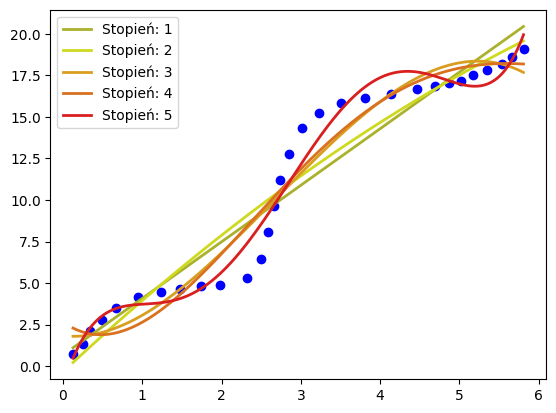

Text(0, 0.5, 'Błąd')

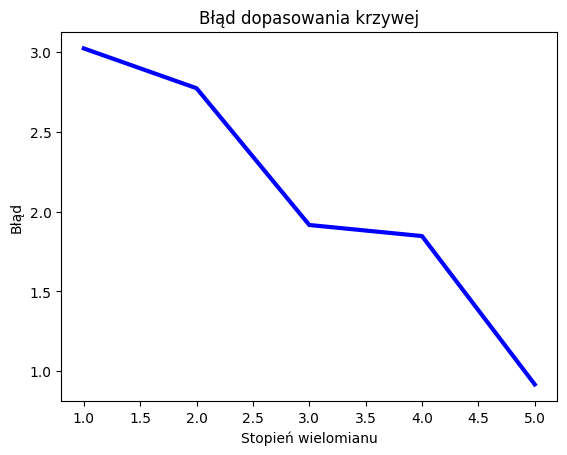

In [33]:
# Obliczenie wartości macierzy rozmiaru k x m, gdzie k - liczba próbek, m - liczba parametrów dla danego stopnia wielomianu
def create_matrix(x, degree):
    X = []
    for i in range(0, len(x)):
        row = []
        for j in range (0, degree + 1):
            row.append(pow(x[i], j))
        X.append(row)
    return X

# Wypisanie macierzy przy zachowaniu stałych szerokości kolumn
def print_matrix(mat):
    for row in mat:
        print("[", end="")
        for x in row:
            print(f'{round(x, 4):<10}', end='')
        print("]")

# Obliczanie wartości funkcji na podstawie argumentów i parametrów
def get_y(x, parameters):
    y = []
    for x_i in x:
        y_i = 0
        for n in range(0, len(parameters)):
            y_i += parameters[n] * pow(x_i, n)
        y.append(y_i)
    return y

# Obliczanie linii trendu i błędu dopasowania krzywej do punktów danych
def get_y_for_degree(x, y, degree):
    X = create_matrix(list(x), degree)
    Y = list(y)
    x_poly=np.arange(min(x), max(x), 0.01)
    
    params = np.dot(np.linalg.pinv(X), Y)
    print("Współczynniki dla stopnia %s: %s" % (degree, params))
    y_pred = get_y(x, params)
    y_poly = get_y(x_poly, params)
    e = metrics.mean_squared_error(Y, y_pred)
    return x_poly, y_poly, e

# Stopnie kolejnych linii trendu
degrees = [1, 2, 3, 4, 5]

#Obliczanie poszczególnych linii trendu
colors = ['#AAB22D', '#CED91F', '#D99E1F', '#D9711F', '#D91F1F']
es = []
plt.scatter(df.x, df.y, color='blue')
for degree, i in zip(degrees, range(0, len(colors))):
    result = get_y_for_degree(df.x, df.y, degree)
    es.append(result[2])
    plt.plot(result[0], result[1], color=colors[i], linewidth=2, label="Stopień: %s" % degree)
    plt.legend()

plt.show()
plt.plot(degrees, es, color='blue', linewidth=3)
plt.title("Błąd dopasowania krzywej")
plt.xlabel("Stopień wielomianu")
plt.ylabel("Błąd")

**Wnioski**
* Wykres błędu dopasowania krzywej do punktów danych od złożoności modelu (stopnia wielomianu) jest malajęcy - wraz ze wzrostem złożoności modelu maleję błąd dopasowania. Jest to zgodne z przewidywaniami teoretycznymi, ponieważ bardziej złożony model powinien być w stanie lepiej dopasować się do danych uczących.

> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

Współczynniki dla stopnia 1: [0.67598343 3.40437956]
Współczynniki dla stopnia 2: [-0.34278788  4.46822922 -0.17889599]
Współczynniki dla stopnia 3: [ 1.83365453 -0.53406525  2.01515328 -0.25026079]
Współczynniki dla stopnia 4: [ 2.66239243 -3.4172711   4.15507644 -0.80247327  0.04607572]
Współczynniki dla stopnia 5: [ -1.19120838  15.27326061 -17.63771678   8.96205829  -1.80156154
   0.12431187]


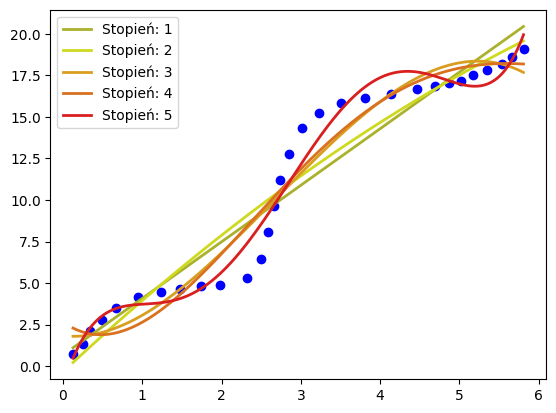

In [34]:
colors = ['#AAB22D', '#CED91F', '#D99E1F', '#D9711F', '#D91F1F']
degrees = [1, 2, 3, 4, 5]
es = []
plt.scatter(df.x, df.y, color='blue')
for degree, i in zip(degrees, range(0,5)):
    
    params = np.polyfit(df.x, df.y, degree)[::-1]
    
    x_poly=np.arange(min(df.x), max(df.x), 0.01)
    y_poly=get_y(x_poly, params)
    print("Współczynniki dla stopnia %s: %s" % (degree, params))
    plt.plot(x_poly, y_poly, color=colors[i], linewidth=2, label="Stopień: %s" % degree)
    plt.legend()

plt.show()

**Wnioski**
* Funkcja *polyfit* z pakietu *numpy* realizuje obliczania współczynników linii trendu dla wybranego stopnia wielomianu.
* Wartości parametrów otrzymane przez gotową funkcję z pakietu są identyczne z tymi obliczonymi samodzielnie. W konsekwencji narysowane linie trendu dla otrzymanych współczynników są takie same.

> **Zadanie** Podziel zbiór na uczący i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

Współczynniki dla stopnia 5: [ -1.02007134  14.4478745  -16.57709397   8.53242553  -1.7336486
   0.12061014]
Współczynniki dla stopnia 7: [-1.01638848e-02  3.70961668e+00  1.26811201e+01 -2.30363979e+01
  1.45741229e+01 -4.19032686e+00  5.62504622e-01 -2.87035808e-02]
Współczynniki dla stopnia 9: [-2.25089011e-01  9.64671791e+00 -2.15938652e+01  4.92377063e+01
 -5.85000531e+01  3.60871918e+01 -1.22121988e+01  2.29813717e+00
 -2.26060035e-01  9.07425466e-03]
Współczynniki dla stopnia 10: [-3.73132985e+00  5.15397428e+01 -1.81955312e+02  3.36275003e+02
 -3.41567741e+02  2.03443570e+02 -7.39944220e+01  1.66453178e+01
 -2.26167413e+00  1.70212792e-01 -5.45140839e-03]
Współczynniki dla stopnia 11: [ 4.92811635e-01 -4.54879483e+00  6.84536110e+01 -1.99894541e+02
  3.03429147e+02 -2.71613103e+02  1.50456365e+02 -5.27056682e+01
  1.16710187e+01 -1.58244866e+00  1.19883422e-01 -3.88701741e-03]
Współczynniki dla stopnia 12: [ 6.45114943e+00 -9.29548627e+01  5.27594550e+02 -1.36383681e+03
  1.982

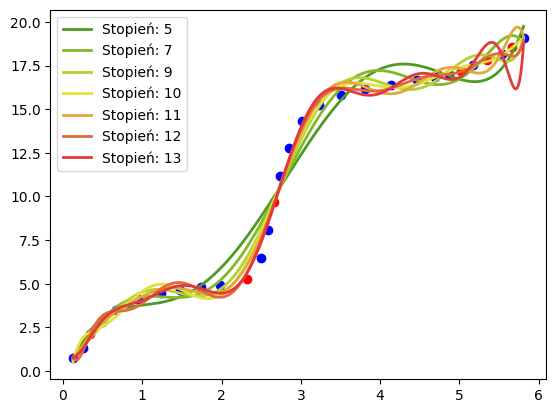

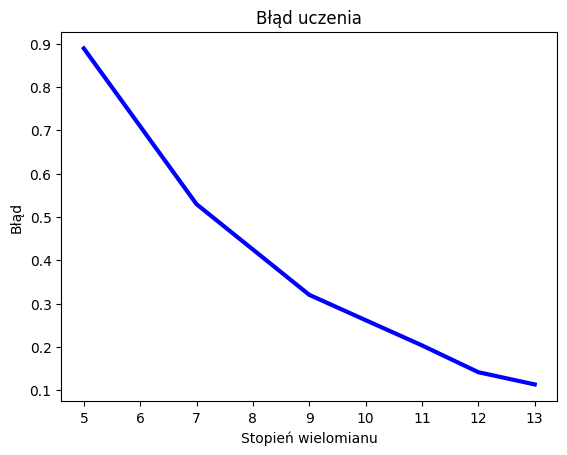

Text(0, 0.5, 'Błąd')

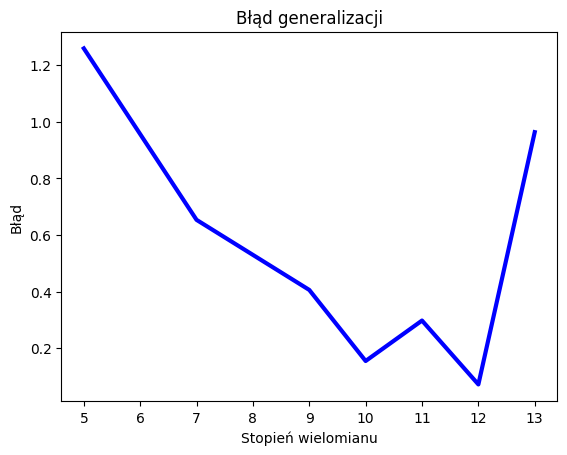

In [35]:
# Obliczanie wartości funkcji na podstawie argumentów i parametrów
def get_y(x, parameters):
    y = []
    for x_i in x:
        y_i = 0
        for n in range(0, len(parameters)):
            y_i += parameters[n] * pow(x_i, n)
        y.append(y_i)
    return y

# Obliczanie linii trendu, błędu uczenia i błędu generalizacji
def get_y_for_degree(x, y, x_test, y_test, degree, plot_range=None):
    X = create_matrix(list(x), degree)
    Y = list(y)
    if plot_range == None:
        x_poly=np.arange(min(x), max(x), 0.01)
    else:
        x_poly=np.arange(plot_range[0], plot_range[1], 0.01)
    
    params = np.dot(np.linalg.pinv(X), Y)
    print("Współczynniki dla stopnia %s: %s" % (degree, params))
    y_pred = get_y(x, params)
    y_pred_test = get_y(x_test, params)
    y_poly = get_y(x_poly, params)
    e_learning = metrics.mean_squared_error(Y, y_pred)
    e_generalization = metrics.mean_squared_error(y_test, y_pred_test)
    return x_poly, y_poly, e_learning, e_generalization


# Stopnie kolejnych linii trendu
degrees = [5, 7, 9, 10, 11, 12, 13]

colors = ['#4C9B23', '#82B929', '#B4D132', '#E2E23A', '#E2A83A', '#E26A3A', '#E23A3A']
es_learning = []
es_generalization = []

# Podział zbioru na uczący i testowy 
x_ucz, x_test, y_ucz, y_test = train_test_split(df.x, df.y, test_size=0.2, random_state=0)

#Obliczanie poszczególnych linii trendu
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='red')
for degree, i in zip(degrees, range(0, len(colors))):
    result = get_y_for_degree(x_ucz, y_ucz, x_test, y_test, degree, [min(df.x), max(df.x)])
    es_learning.append(result[2])
    es_generalization.append(result[3])
    plt.plot(result[0], result[1], color=colors[i], linewidth=2, label="Stopień: %s" % degree)
    plt.legend()

plt.show()
plt.plot(degrees, es_learning, color='blue', linewidth=3)
plt.title("Błąd uczenia")
plt.xlabel("Stopień wielomianu")
plt.ylabel("Błąd")
plt.show()
plt.plot(degrees, es_generalization, color='blue', linewidth=3)
plt.title("Błąd generalizacji")
plt.xlabel("Stopień wielomianu")
plt.ylabel("Błąd")

**Wnioski**
* W przypadku wybranych danych najlepszym stopnień wielomianu byłby **stopień 10 lub 12**. Pomimo, że możliwe jest uzyskanie mniejszego błędu uczenia dla wyższych stopni wielomianu to jest to również związane z drastycznym wzrostem błędu generalizacji. W procesie szukania optymalnego stopnia wielomianu należy kierować się zarówno błędem uczenia, który oddaje poziom dopasowania linii trendu do zbioru uczącego, jak również błędem generalizacji, który pokazuje skuteczność predykcji dla zbioru walidacyjnego - zachowanie kompromisu między obciążeniem a wariancją (ang. bias–variance tradeoff).

> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

> **Odpowiedzi**
1) Tak, jest możliwe zminimalizowanie błędu uczenia do 0. Wymaga to użycia **stopnia wielomianu o jeden mniejszego od liczby próbek**. Przy takim dobraniu parametrów uzyskana linia jest interpolacją zbioru danych, która charakteryzyje się przechodzeniem przez wszystkie punkty, co pozwala na uzyskanie błędu uczenia na poziomie 0. Niemniej jednak, w większości przypadków jest to sytuacji niepożądana, ponieważ zaburza zdolności generalizacyjne modelu.


2) W procesie dobierania stopnia wielomianu należy uwzględnić zarówno błąd uczenia, jak i błąd generalizacji. Kierowanie się wyłączenie błędem uczenia pozwoli na zminimalizowanie tej wartości nawet do 0, ale prawdodopodbnie będzie to związane z bardzo dużym błędem generalizacji. W efekcie uzyskany model, pomimo bardzo dobrego dopasowania do danych uczących, będzie popełniał duże błędy dla danych testowych. 


3) Równanie posiada rozwiązanie przybliżone, gdy X jest pełnego rzędu kolumnowego.


4) Parametry modelu zwiększają się wraz ze wzrostem stopnia wielomianu.